# Using Scikit-Learn for Machine Learning

Scikit-Learn is a python library for machine learning.

Some things you can do with scikit-learn: http://scikit-learn.org/stable/
<img src="scikit-learn.png" width="800">

This demo is a summarized version of:
https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/10%20Case%20Study%20-%20Titanic%20Survival.ipynb



In this demo we'll see:
1. How to load data from different sources.
1. How to do apply some data preprocessing using scikit-learn and Pandas.
2. How to use scikit-learn for cross-validation
2. How to run all the algorithms we've seen in class (decision tree, perceptron, SVM) with scikit-learn


## Loading in the Data

### Pre-Installed Datsets

Scikit learn has some pre-installed datasets: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

We're going to check out the "Iris" dataset. More information on the Iris dataset is available here: https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.keys())
#You can check out the description of the dataset using the following command
#print(iris.DESCR)

n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print('Features:', iris.feature_names)
print(iris.data[0])

dict_keys(['DESCR', 'target', 'data', 'feature_names', 'target_names'])
Number of samples: 150
Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]


In [3]:
print("Shape of the features:", iris.data.shape)
print("Shape of the labels:", iris.target.shape)

Shape of the features: (150, 4)
Shape of the labels: (150,)


In [4]:
# all of the labels
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's create a scatter plot of the data to get an idea of how it looks. For this we'll use python library, Matplotlib.

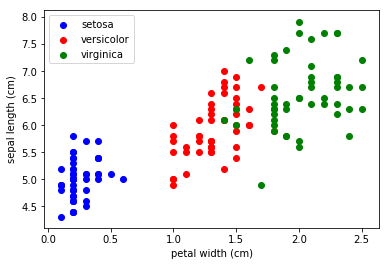

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### Loading your own dataset
There are different places where you can find data sets like Kaggle, https://archive.ics.uci.edu/ml/datasets.html.

Here, we'll be using the titanic dataset. The description can be found here: https://www.kaggle.com/c/titanic/data

In [6]:
import os
import pandas as pd

#loading the datset from .csv file
titanic = pd.read_csv(os.path.join('data', 'titanic.csv'))

#print columns
print(titanic.columns)

#labels are stored in column survived. Fetching labels.
labels = titanic.survived.values

#fetch the columns that we'll be using for our models
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked']]
data.shape


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


(1309, 5)


## Scikit-learn with real world data: Preprocessing

### Binning
Binning is a technique which is used to convert continuous values to discrete values for the ease of classification.

If regression is being used, continuous values can be used directly.

In [7]:
# let's have a look at ages and fares
print('age')
print(titanic['age'].head(5))
print()
print('fare')
print(titanic['fare'].head(5))
print()

#lets look at min, max, median and mean for age and fare. This will help us in deciding the bins
print('property | Age | Fare')
print('min', titanic['age'].min(), titanic['fare'].min())
print('max', titanic['age'].max(), titanic['fare'].max())
print('median', titanic['age'].median(), titanic['fare'].median())
print('mean', titanic['age'].mean(), titanic['fare'].mean())
data.shape

age
0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

fare
0    211.3375
1    151.5500
2    151.5500
3    151.5500
4    151.5500
Name: fare, dtype: float64

property | Age | Fare
min 0.1667 0.0
max 80.0 512.3292
median 28.0 14.4542
mean 29.8811345124 33.2954792813


(1309, 5)

In [8]:
#create bins for age and fare
bins_age = [0, 25, 60,  100]
bins_fare = [0, 25, 100, 1000]

age_groups = ['young', 'adult', 'senior']
fare_groups = ['low', 'medium', 'high']

data['age'] = pd.cut(titanic['age'], bins_age, labels=age_groups)
data['fare'] = pd.cut(titanic['fare'], bins_fare, labels=fare_groups)

#remove original columns
# del data['age']
# del data['fare']

data.head(5)


D:\Softwares\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Softwares\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,pclass,sex,sibsp,parch,embarked,age,fare
0,1,female,0,0,S,adult,high
1,1,male,1,2,S,young,high
2,1,female,1,2,S,young,high
3,1,male,1,2,S,adult,high
4,1,female,1,2,S,young,high


### Converting Categorical values to Numerical values

Here we will be converting categorical values like Male/Female to numerical values like 1/2 for easier processing.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(type(data['sex'][0]))
data['sex'] = le.fit_transform(data['sex'])
le = LabelEncoder()
print(data.head(25))
# data['embarked'] = le.fit_transform(data['embarked'])
data['embarked'] = data['embarked'].factorize()[0]
# data['embarked'] = le.fit_transform(data['embarked'])

print(data.head(25))
# list(le.classes_)

<class 'str'>
    pclass  sex  sibsp  parch embarked     age    fare
0        1    0      0      0        S   adult    high
1        1    1      1      2        S   young    high
2        1    0      1      2        S   young    high
3        1    1      1      2        S   adult    high
4        1    0      1      2        S   young    high
5        1    1      0      0        S   adult  medium
6        1    0      1      0        S  senior  medium
7        1    1      0      0        S   adult     NaN
8        1    0      2      0        S   adult  medium
9        1    1      0      0        C  senior  medium
10       1    1      1      0        C   adult    high
11       1    0      1      0        C   young    high
12       1    0      0      0        C   young  medium
13       1    0      0      0        S   adult  medium
14       1    1      0      0        S  senior  medium
15       1    1      0      0        S     NaN  medium
16       1    1      0      1        C   young    h

D:\Softwares\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Softwares\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
data['age'] = data['age'].factorize()[0]
# data['age'] = le.fit_transform(data['age'])
data['fare'] = data['fare'].factorize()[0]
# data['fare'] = le.fit_transform(data['fare'])

data.head(25)

D:\Softwares\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Softwares\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pclass,sex,sibsp,parch,embarked,age,fare
0,1,0,0,0,0,0,0
1,1,1,1,2,0,1,0
2,1,0,1,2,0,1,0
3,1,1,1,2,0,0,0
4,1,0,1,2,0,1,0
5,1,1,0,0,0,0,1
6,1,0,1,0,0,2,1
7,1,1,0,0,0,0,-1
8,1,0,2,0,0,0,1
9,1,1,0,0,1,2,1


### Handling missing values

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import numpy as np 


# imp = Imputer(strategy="median") # can supply different strategies
# imp.fit(data)
# data = imp.transform(data)


# print("All the training data", data)
# print("Age", data[:,1])
# data = pd.DataFrame(data)
# type(data)
# data
data = data.replace('-1', np.nan)
print(data)
data = data.fillna(data.median())
data

      pclass  sex  sibsp  parch  embarked  age  fare
0          1    0      0      0       0.0  0.0   0.0
1          1    1      1      2       0.0  1.0   0.0
2          1    0      1      2       0.0  1.0   0.0
3          1    1      1      2       0.0  0.0   0.0
4          1    0      1      2       0.0  1.0   0.0
5          1    1      0      0       0.0  0.0   1.0
6          1    0      1      0       0.0  2.0   1.0
7          1    1      0      0       0.0  0.0   NaN
8          1    0      2      0       0.0  0.0   1.0
9          1    1      0      0       1.0  2.0   1.0
10         1    1      1      0       1.0  0.0   0.0
11         1    0      1      0       1.0  1.0   0.0
12         1    0      0      0       1.0  1.0   1.0
13         1    0      0      0       0.0  0.0   1.0
14         1    1      0      0       0.0  2.0   1.0
15         1    1      0      0       0.0  NaN   1.0
16         1    1      0      1       1.0  1.0   0.0
17         1    0      0      1       1.0  0.0

,pclass,sex,sibsp,parch,embarked,age,fare
0,1,0,0,0,0.0,0.0,0.0
1,1,1,1,2,0.0,1.0,0.0
2,1,0,1,2,0.0,1.0,0.0
3,1,1,1,2,0.0,0.0,0.0
4,1,0,1,2,0.0,1.0,0.0
5,1,1,0,0,0.0,0.0,1.0
6,1,0,1,0,0.0,2.0,1.0
7,1,1,0,0,0.0,0.0,2.0
8,1,0,2,0,0.0,0.0,1.0
9,1,1,0,0,1.0,2.0,1.0


### Converting Categorical Values to Boolean Values (Binary Values)
We will be using one-hot-encoding to convert categorical features to binary features.

####What is one-hot-encoding?

When a column has categorical values, it is hard for the machine learning algorithm to train  upon. To make it more suitable for the ML algorithms, we convert each category for that column to a boolean column. Only one of the columns can take a value of one for a single sample. Hence, it is called as one hot encoding. 

(eg) Suppose you have ‘flower’ feature which can take values ‘daffodil’, ‘lily’, and ‘rose’. One hot encoding converts ‘flower’ feature to three features, ‘is_daffodil’, ‘is_lily’, and ‘is_rose’ which all are binary.

We will be using pandas' get_dummies() function which is equivalent to scikit-learn OneHotEncoder.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

Refer: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [12]:
#to convert all categorical columns to boolean columns
# data = pd.get_dummies(data)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_data = enc.fit_transform(data).toarray()

#you can also select the columns to convert. I don't know why you would do that though!
# data = pd.get_dummies(data, columns=[ 'sex', 'embarked', 'age', 'fare'])
print(enc_data)

[[ 1.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  1.]]


### Scaling features 

In [13]:
from sklearn import preprocessing


processed_age_data = preprocessing.scale(data['age'])

print("The mean of the original age data is", data['age'].mean(axis=0))
print("The std  of the original age data is", data['age'].std(axis=0))
print()

print("The mean of the transformed age data is", processed_age_data.mean(axis=0))
print("The std  of the transformed age data is", processed_age_data.std(axis=0))


The mean of the original age data is 0.38884644767
The std  of the original age data is 0.536922051228

The mean of the transformed age data is 2.71406698151e-17
The std  of the transformed age data is 1.0


# Creating a Test-Train Split
Still the Titanic dataset

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)

enc_train_data, enc_test_data, enc_train_labels, enc_test_labels = train_test_split(enc_data, labels, random_state=0)
#Again fill in missing values
# imp = Imputer()
# imp.fit(train_data)
# train_data_finite = imp.transform(train_data)
# test_data_finite = imp.transform(test_data)

# Algorithms we know in scikit-learn
### Most Common Label Classifier

Scikit learn calls this a "dummy" classifier. Easy "baseline" for learning.

In [15]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(train_data, train_labels)
print("Prediction accuracy: %f" % clf.score(test_data, test_labels))

Prediction accuracy: 0.634146


### SVM

More info at: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [45]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=4000)
clf.fit(train_data, train_labels)

print(clf.coef_)
print(clf.intercept_)
print(clf.score(test_data, test_labels))


clf.fit(enc_train_data, enc_train_labels)
LinearSVC()

print(clf.coef_)
print(clf.intercept_)
print(clf.score(enc_test_data, enc_test_labels))

[[-0.24091386 -1.01926197 -0.10676417 -0.00748992  0.09276051  0.0326393
  -0.06525052]]
[ 1.08556847]
0.786585365854
[[ 0.11105987 -0.11283395 -0.32846026  0.33539996 -0.66563429  0.54656211
   0.48331344  0.41465697  0.16695632 -0.54638545 -0.64570403 -0.74963369
   0.31757107  0.53572553  0.42170866  0.32490162 -0.07809115 -0.64545968
  -0.60329543 -0.60329496 -0.222609   -0.03532068 -0.07230466  0.01468183
   0.13990158 -0.48481775 -0.10131836 -0.0471501  -0.18176588]]
[-0.33023434]
0.792682926829


## Cross Validating SVM

We will be cross validating for parameter C. As you might remeber from class, C is the penalty parameter of the error formula.

From http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'C': [1e-3, 1e-2, 1e-2, 1, 10, 100, 1000, 5000]}]

print("# Tuning hyper-parameters for accuracy")
print()

clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=5,
                   scoring='accuracy')
clf.fit(train_data, train_labels)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


clf = LinearSVC(random_state=4000, C=clf.best_params_['C'])
clf.fit(train_data, train_labels)

print(clf.coef_)
print(clf.intercept_)
print(clf.score(test_data, test_labels))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 0.01}

Grid scores on development set:

0.679 (+/-0.023) for {'C': 0.001}
0.795 (+/-0.028) for {'C': 0.01}
0.795 (+/-0.028) for {'C': 0.01}
0.792 (+/-0.028) for {'C': 1}
0.789 (+/-0.023) for {'C': 10}
0.739 (+/-0.077) for {'C': 100}
0.681 (+/-0.306) for {'C': 1000}
0.608 (+/-0.319) for {'C': 5000}

[[-0.18379599 -0.76373116 -0.06978269  0.03984783  0.1292801   0.05283752
  -0.00391419]]
[ 0.61032088]
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=4000, tol=0.0001,
     verbose=0)
0.786585365854


### Perceptron

In [18]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=2000)
clf.fit(train_data, train_labels)
Perceptron()

print(clf.coef_)
print(clf.intercept_)
print(clf.score(test_data, test_labels))


clf.fit(enc_train_data, enc_train_labels)
Perceptron()

print(clf.coef_)
print(clf.intercept_)
print(clf.score(enc_test_data, enc_test_labels))


[[ -6. -13.  -1.  -1.   2.   0.  -3.]]
[ 12.]
0.725609756098
[[ 3. -1. -3.  1. -2.  2.  1.  4.  1. -4. -2. -3.  0.  3.  2.  3. -2. -4.
  -2. -1. -3.  2.  0. -1.  2. -2.  0.  2. -3.]]
[-1.]
0.762195121951


### Decision Tree


In [19]:
#http://scikit-learn.org/stable/modules/tree.html
import graphviz 
from sklearn import tree

#for windows, uncomment the following and replace with path of you local Graphviz.38/bin. Include path of bin and not python lib
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini')

clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_enc')

Accuracy 0.795731707317
The depth of this tree is 11
Accuracy 0.801829268293
The depth of this tree is 10


'graphs/dt_gini_enc.pdf'

We can try using a different criterion to build the tree.

In [21]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_entropy')

clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_entropy_enc')


Accuracy 0.795731707317
The depth of this tree is 11
Accuracy 0.801829268293
The depth of this tree is 11


'graphs/dt_entropy_enc.pdf'

Let's try limiting the depth and visualize our tree...

http://scikit-learn.org/stable/modules/tree.html

Accuracy 0.77743902439
The depth of this tree is 1


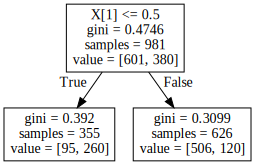

In [22]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_limit')
graph

Accuracy 0.77743902439
The depth of this tree is 1


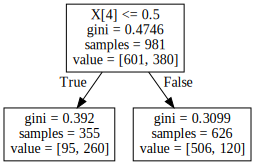

In [23]:
# clf.tree_.__getstate__()
clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_limit_enc')
graph

### Random Forest

Here we'll be training a random forest. Try modifying the parameters and see how it affects the accuracy

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=35, criterion='gini')
clf.fit(train_data, train_labels)
print(clf.feature_importances_)
print(clf.score(test_data, test_labels))

[ 0.16405715  0.51632839  0.07169227  0.07324637  0.04818935  0.0360459
  0.09044058]
0.817073170732


### Other algorithms we haven't covered in class

- Logistic Regression
- Naive Bayes
- Adaboost
- Multiclass classifiers
- K Nearest Neighbors
- Kernels

### Links!
- Scikit learn official page: http://scikit-learn.org/stable/index.html

- Pandas official page: http://pandas.pydata.org/pandas-docs/stable/index.html

- lots of scikit demos: https://github.com/amueller/scipy-2016-sklearn/tree/master/notebooks

- svm documentation: http://scikit-learn.org/stable/modules/svm.html

- decision tree documentation: http://scikit-learn.org/stable/modules/tree.html

- perceptron documentation: http://scikit-learn.org/stable/modules/linear_model.html#perceptron

- graphing trees: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- cross-validation parameter search documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py